## <b>Problem 4: Linear Perceptron </b>
#### <b>Part 1: Theorical Analysis</b>

Let us call the given shape $S$ and name each line containing its sides as follow:


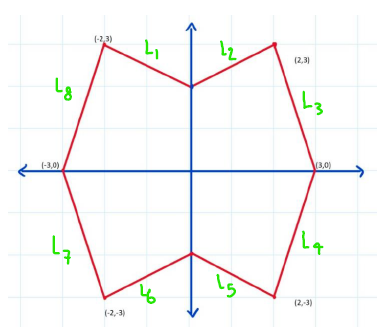

We claim that a point $A$ lies inside $S$ if and only if all the following conditions hold simultiously:


1.   $A$ lies on the left side of $L_3$
2.   $A$ lies on the left side of $L_4$
3.   $A$ lies on the right side of $L_8$
4.   $A$ lies on the right side of $L_7$
5.   $A$ lies below $L_1$ or below $L_2$
6.   $A$ lies above $L_6$ or above $L_5$

it is easy to check that the claim is true. Now we try to develop a multilayer perceptron model that fulfills all the above conditions for a given point




First, we right expressions for each of the above conditions. Let $A=(x,y)$. It can be easily seen that each of the above is equavalent with:
1. $y<-3x+9$
2. $y>3x-9$
3. $y>-3x-9$
4. $y<3x+9$
5. $y<-0.5x+2$ or $y<0.5x+2$
6. $y>-0.5x-2$ or $y>0.5x-2$

Now we develop a perceptron model to simulate $y<ax+b$ and $y>ax+b$. It's obvious that using this model, we can easily design the model asked by the problem, because we already know how to implement AND and OR functions using perceptrons. For $y<ax+b$ and $y>ax+b$ one can easily check that following models work:


$y>ax+b$:

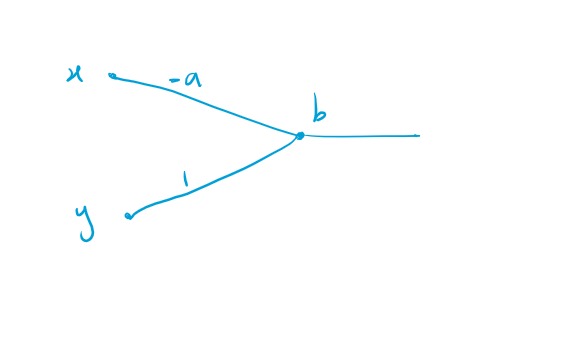

$y<ax+b$:

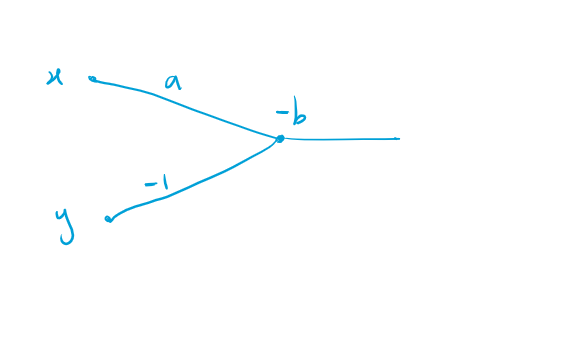

So the final model will look like this:

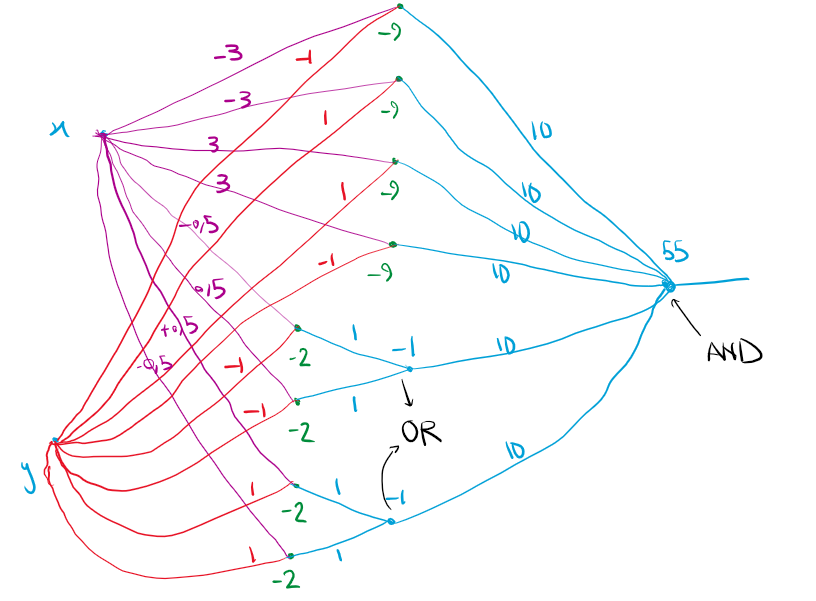

#### <b>Part 2: Practical Implementation: </b>

Following code simply simulates the model we described in the previous part:

In [ ]:
def linear_perceptron(w, x, mu):
    result = np.matmul(w.T, x) - mu
    if result > 0:
        return 1
    else:
        return -1



In [ ]:
import numpy as np


def is_point_inside(a):
    mu1, mu2, mu3, mu4 = -9, -2, -1, 55

    l1 = np.asarray([-0.5, -1]).reshape((2, 1))
    l2 = np.asarray([0.5, -1]).reshape((2, 1))
    l3 = np.asarray([-3, -1]).reshape((2, 1))
    l4 = np.asarray([-3, 1]).reshape((2, 1))
    l5 = np.asarray([0.5, 1]).reshape((2, 1))
    l6 = np.asarray([-0.5, 1]).reshape((2, 1))
    l7 = np.asarray([3, 1]).reshape((2, 1))
    l8 = np.asarray([3, -1]).reshape((2, 1))

    r1 = linear_perceptron(l1, a, mu2)
    r2 = linear_perceptron(l2, a, mu2)
    r3 = linear_perceptron(l3, a, mu1)
    r4 = linear_perceptron(l4, a, mu1)
    r5 = linear_perceptron(l5, a, mu2)
    r6 = linear_perceptron(l6, a, mu2)
    r7 = linear_perceptron(l7, a, mu1)
    r8 = linear_perceptron(l8, a, mu1)
    r12 = linear_perceptron(np.asarray([1, 1]).reshape((2, 1)), np.asarray([r1, r2]).reshape((2, 1)), mu3)
    r56 = linear_perceptron(np.asarray([1, 1]).reshape((2, 1)), np.asarray([r5, r6]).reshape((2, 1)), mu3)

    w_and = np.ones((6, 1)) * 10
    r = np.asarray([r3, r4, r7, r8, r12, r56]).reshape((6, 1))
    result = linear_perceptron(w_and, r, mu4)
    return result
